In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

In [2]:
slow_geol = Dataset('slow/geology-optimized.nc')
print(slow_geol.variables.keys())

slow_out = Dataset('slow/output.nc')
print(slow_out.variables.keys())

dict_keys(['y', 'x', 'usurf', 'thk', 'slidingco', 'velsurf_mag', 'velsurfobs_mag', 'divflux', 'icemask'])
dict_keys(['time', 'y', 'x', 'z', 'topg', 'usurf', 'thk', 'smb', 'velsurf_mag', 'velbase_mag', 'uvelbase', 'vvelbase'])


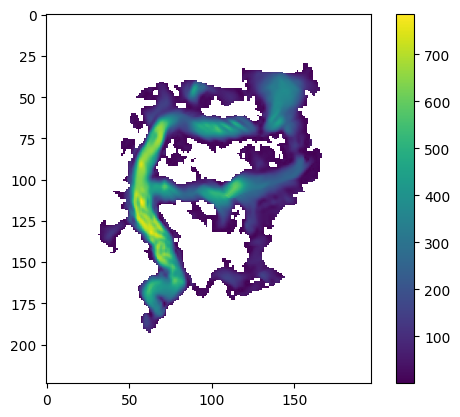

In [3]:
var = slow_geol.variables['thk']
field = np.flip(np.where(slow_geol.variables['thk'][:] > 0.1, var, np.nan), axis = 0)
im = plt.imshow(field)
plt.colorbar(im)
plt.show()

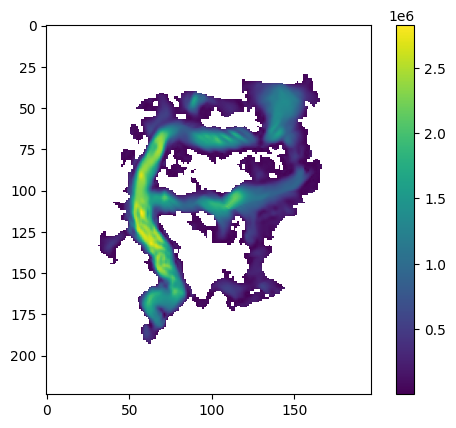

In [4]:
var = slow_geol.variables['thk'][:] * 917 * 9.81 * 0.4
field = np.flip(np.where(slow_geol.variables['thk'][:] > 0.1, var, np.nan), axis = 0)
im = plt.imshow(field)
plt.colorbar(im)
plt.show()

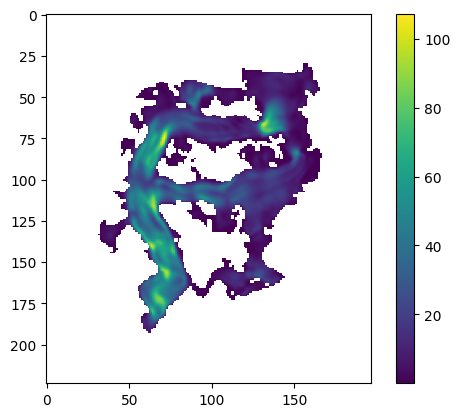

In [5]:
var = np.sqrt(slow_out.variables['uvelbase'][:]**2 + slow_out.variables['vvelbase'][:]**2)
field = np.flip(np.where(slow_geol.variables['thk'][:] > 0.1, var, np.nan), axis = 1)
im = plt.imshow(field[0], cmap = 'viridis')
plt.colorbar(im)
plt.show()

/home/egp/dev/mambaforge/envs/igm/lib/python3.10/site-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


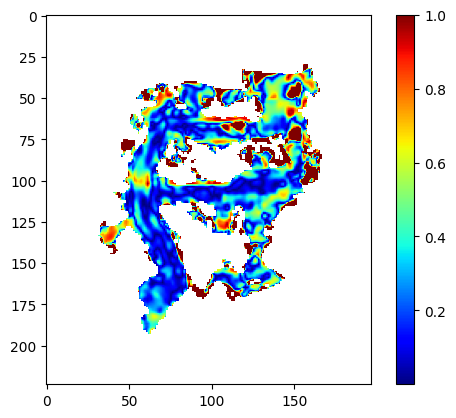

In [6]:
var = np.abs((slow_geol.variables['velsurfobs_mag'] - slow_out.variables['velsurf_mag'][:]) / slow_out.variables['velsurf_mag'][:])
field = np.flip(np.where(slow_geol.variables['thk'][:] > 0.1, var, np.nan), axis = 1)
im = plt.imshow(field[0], vmax = np.percentile(var, 90), cmap = 'jet')
plt.colorbar(im)
plt.show()

In [7]:
fast_geol = Dataset('fast/geology-optimized.nc')
print(slow_geol.variables.keys())

fast_out = Dataset('fast/output.nc')
print(slow_out.variables.keys())

dict_keys(['y', 'x', 'usurf', 'thk', 'slidingco', 'velsurf_mag', 'velsurfobs_mag', 'divflux', 'icemask'])
dict_keys(['time', 'y', 'x', 'z', 'topg', 'usurf', 'thk', 'smb', 'velsurf_mag', 'velbase_mag', 'uvelbase', 'vvelbase'])


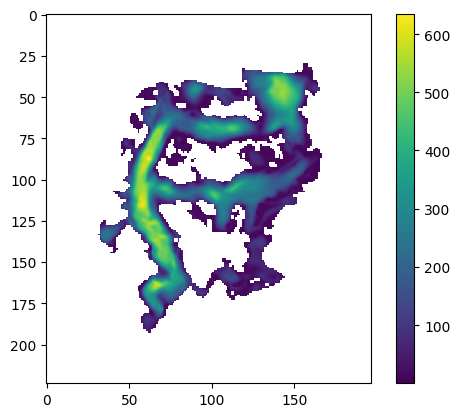

In [8]:
var = fast_geol.variables['thk'][:]
field = np.flip(np.where(slow_geol.variables['thk'][:] > 0.1, var, np.nan), axis = 0)
im = plt.imshow(field)
plt.colorbar(im)
plt.show()

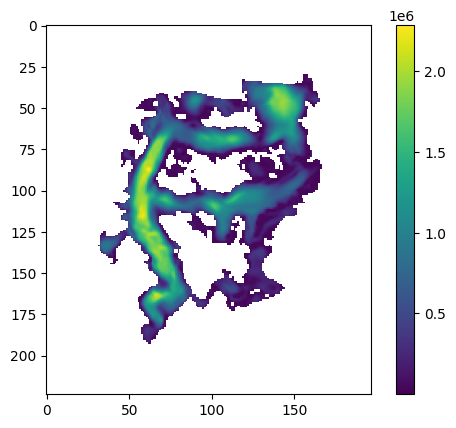

In [9]:
var = fast_geol.variables['thk'][:] * 917 * 9.81 * 0.4
field = np.flip(np.where(slow_geol.variables['thk'][:] > 0.1, var, np.nan), axis = 0)
im = plt.imshow(field)
plt.colorbar(im)
plt.show()

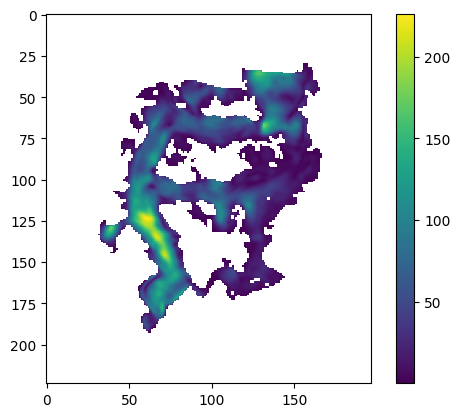

In [10]:
var = np.sqrt(fast_out.variables['uvelbase'][:]**2 + fast_out.variables['vvelbase'][:]**2)
field = np.flip(np.where(fast_geol.variables['thk'][:] > 0.1, var, np.nan), axis = 1)
im = plt.imshow(field[0])
plt.colorbar(im)
plt.show()

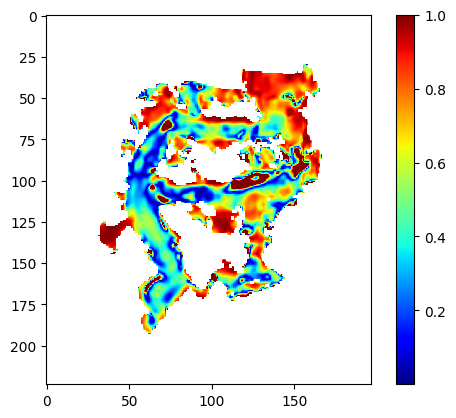

In [11]:
var = np.abs((fast_geol.variables['velsurfobs_mag'] - fast_out.variables['velsurf_mag'][:]) / fast_out.variables['velsurf_mag'][:])
field = np.flip(np.where(fast_geol.variables['thk'][:] > 0.1, var, np.nan), axis = 1)
im = plt.imshow(field[0], vmax = np.percentile(var, 90), cmap = 'jet')
plt.colorbar(im)
plt.show()